# Exploring Income Factors

I want to explore the what factors are most predictive of income in America.

This project is a large undertaking for a single computer, and as such will be split into 3 parts. In the first part, I will import and combine the data. The second part will pertain to my data cleaning and feature selection. Finally, I will perform descriptive modeling with the most important factors towards predicting income in the third part.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import savReaderWriter

# Part 1: Importing the Data

I will use data form the General Social Survey (GSS) from the NORC. This survey has been collecting data on the quality of American life, especially through the lens of work and employeee, binanually since 1972. 

Of course, as our understanding of underlying social forces has changed, so has the GSS survey, going through multiple changes and iterations since its inception.  As such, I will only be using data from the 2000 ownwards, to ensure that I can take advantage of the current survey versions' increased sophistication.

This is a very large data set. I must be read from it's individual years and then combined. To save on computer memory, I will do that combining here. 

In [2]:
# function to the GSS sav files and return them as dataframes
def import_sav(filepath):
    with savReaderWriter.SavReader(filepath) as reader:
        header = reader.header
        records = reader.all()
        header_str = []
        for feature in header:
            header_str.append(feature.decode('ascii'))
        df = pd.DataFrame(records, columns = header_str)
        return df

In [3]:
# import the individual sav files
work00 = import_sav('C:\\Code\\SSP\\work00.sav')
work02 = import_sav('C:\\Code\\SSP\\work02.sav')
work04 = import_sav('C:\\Code\\SSP\\work04.sav')
work06 = import_sav('C:\\Code\\SSP\\work06.sav')
work08 = import_sav('C:\\Code\\SSP\\work08.sav')
work10 = import_sav('C:\\Code\\SSP\\work10.sav')
work12 = import_sav('C:\\Code\\SSP\\work12.sav')
work14 = import_sav('C:\\Code\\SSP\\work14.sav')
work16 = import_sav('C:\\Code\\SSP\\work16.sav')

# Combining Years

Now that I have all the years imported, I will combine them into one. Before I do that, I must determine which features all the years share.

In [4]:
# create a list of common features between all GSS years
shared_features = list(set(work16.columns).intersection(work14.columns))
shared_features = list(set(shared_features).intersection(work12.columns))
shared_features = list(set(shared_features).intersection(work10.columns))
shared_features = list(set(shared_features).intersection(work08.columns))
shared_features = list(set(shared_features).intersection(work06.columns))
shared_features = list(set(shared_features).intersection(work04.columns))
shared_features = list(set(shared_features).intersection(work02.columns))
shared_features = list(set(shared_features).intersection(work00.columns))

In [5]:
print('There are ',len(shared_features),' shared features')

There are  407  shared features


In [6]:
work_mult = pd.concat([work16[shared_features],work14[shared_features],work12[shared_features],
                       work10[shared_features],work08[shared_features],work06[shared_features],work04[shared_features],
                       work02[shared_features],work00[shared_features]])

In [7]:
work_mult.reset_index(drop=True,inplace=True)

# Checking Income Interaction

Before I move onto the next part, I want to make income does not have any strange interactions with any of it's possible features.  The best decriptive models to use are usually linear ones, as they are fairly robust while providing plenty of information about they arrived at their results. One of the most important requirements of a linear model is that its predictive features must correalte linearly. 

One feature I am worried about is this with is age. I will plot age of the respondant against respondant Income.

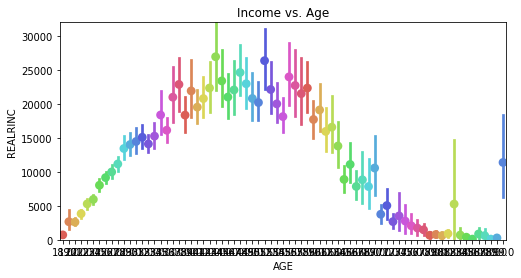

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(x='AGE',y="REALRINC",data=work_mult,alpha=0.1,palette=sns.color_palette("hls", 20),ax=ax)
plt.title('Income vs. Age')
plt.ylim(0,32000)
plt.show()

As I feared, age has a fairly strange relationship with Income. It is certainly not linear, but it does not appear to able to be transformed to be linear eihter. This could prove to be a hinderance to my model, but at the same time I don't want to completely through out the age varaible either. Age is a naturally important factor to income, most people increase their income as they age through youth and the beginings of middle age but plateau and begin to fall somewhere around middle age or the beginning of old age. This trend is important and something I want to include. 

To remedy this, I will use a Linear Mixed Effect (LME) model when performing descriptive modeling.  This will allow me to control for age and see just how age affects income, while also building a descriptive linear model. 

In [9]:
#work_mult.to_csv('C:\\Code\\SSP\\workmult.csv')

Now that my data is combined and saved, I can move onto feature selection.